# **5. En PYTHON grafique el árbol de decisión del dataset seleccionado (tome 4 columnas y 20 filas al azar).**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
|--- ACCELEROMETER Y (m/s²) <= -2.54
|   |--- ACCELEROMETER X (m/s²) <= 2.70
|   |   |--- class: Football
|   |--- ACCELEROMETER X (m/s²) >  2.70
|   |   |--- class: Cycling
|--- ACCELEROMETER Y (m/s²) >  -2.54
|   |--- ACCELEROMETER X (m/s²) <= -3.92
|   |   |--- class: Sitting
|   |--- ACCELEROMETER X (m/s²) >  -3.92
|   |   |--- ACCELEROMETER Z (m/s²) <= -7.55
|   |   |   |--- class: Sitting
|   |   |--- ACCELEROMETER Z (m/s²) >  -7.55
|   |   |   |--- class: Cycling



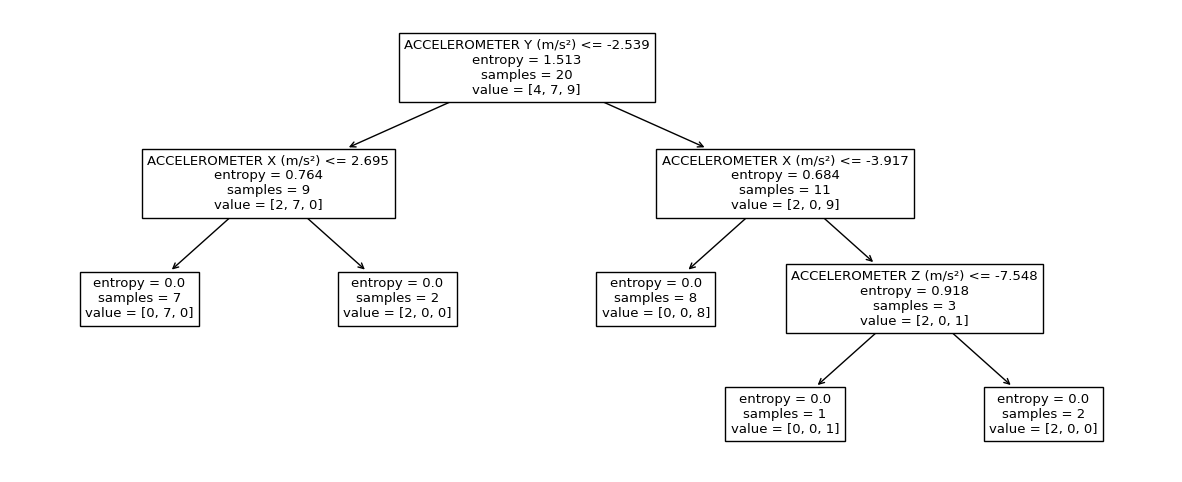

In [65]:
from sklearn import tree
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/INF_354/dataset_examen1')
dc=pd.read_csv("Cycling.csv").assign(Activity="Cycling")
df=pd.read_csv("Football.csv").assign(Activity="Football")
dsi=pd.read_csv("Sitting.csv").assign(Activity="Sitting")
datos=pd.concat([dc,df,dsi])

#seleccion de 4 filas y 20 columnas
datosArbol=datos[['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)','Activity']]
datosArbol=datosArbol.sample(n=20)
datosArbol.head(20)
x=np.array(datosArbol.drop('Activity',axis=1))
y=np.array(datosArbol[['Activity']])
#generacion del arbol apartir de los datos 
clasificador = tree.DecisionTreeClassifier(criterion="entropy")
arbol_decision=clasificador.fit(x,y)
r=tree.export_text(arbol_decision,feature_names=['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)'])
print(r)
plt.figure(figsize=(15,6))
tree.plot_tree(arbol_decision,feature_names=['ACCELEROMETER X (m/s²)','ACCELEROMETER Y (m/s²)','ACCELEROMETER Z (m/s²)'])
plt.show()
